# Using astroplan to calculate rise set time and airmass

This program uses observation data for landolt 110-a observed on 2003-07-28 10:05:36 UTC. I've written this to check the calculations and to get a handle on how to use the routines. This will be generally useful for planning observations in the future.<p>
*Author: Eric G. Suchanek 3/20/19*

Observation at: 2003-07-28 10:05:36.890 UTC, 2003-07-28 03:05:36.890 LZT 
Object rises at: 2003-07-28 00:29:10.769 UTC
Objects sets at: 2003-07-28 12:25:57.316 UTC


No handles with labels found to put in legend.


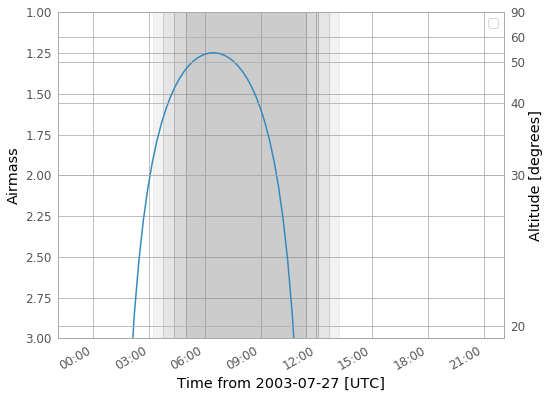

Local apparent RA, Dec, 12:15:24.9314 -0:28:03.994, HA: +3:38:19.0686


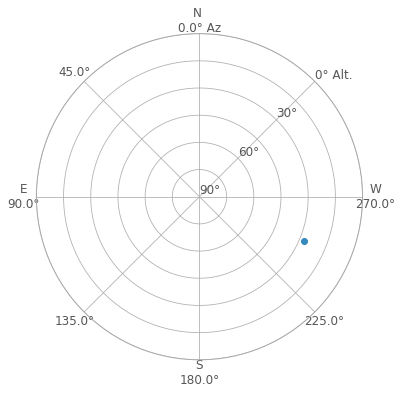

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, ITRS
from astropy.coordinates import EarthLocation
from pytz import timezone

from astroplan import Observer
from astroplan.plots import plot_sky
from astroplan.plots import plot_airmass 

# Suppress warnings. Comment this out if you wish to see the warning messages
import warnings
warnings.filterwarnings('ignore')

#
# DST calculation for a given date
# expects date to be .unix format

def is_dst(date):
    return bool(time.localtime(date).tm_isdst)

utc_offset = -7 * u.hour # dst in effect for this observation

# OOS
sitelong = '-121:34:00'
sitelat = '36:18:20'
height = 1525*u.m

# landolt 110-1a
obstime = Time('2003-07-28 10:05:36.890') # UTC 
obstime_local = obstime + utc_offset
obstime_now = Time('2019-07-28 10:05:36.890') # UTC 

_ra = "18h43m09.574s"
_dec = "-0d29m24.605s"

landolt = SkyCoord(_ra,_dec,
                   obstime=obstime,
                   equinox=Time('J2003.7',scale='utc'))

OOS = EarthLocation(lat=sitelat, lon=sitelong, height=height) 
WSO = EarthLocation(lat=39.3*u.deg, lon=-120*u.deg, height=60*u.m)

# Set up our Observatory location.
# OOS coordinates taken from Google Earth

def is_dst(date):
    return bool(time.localtime(date).tm_isdst)

Whitney = Observer(name='Whitney',
               location=OOS,
               pressure=1.0 * u.bar,
               relative_humidity=0.11,
               temperature=27 * u.deg_C,
               timezone=timezone('US/Pacific'),
               description="MIRA Telescope on Chews Ridge, CA USA")

landolt_rise = Whitney.target_rise_time(obstime, landolt)
landolt_set = Whitney.target_set_time(obstime, landolt)
landolt_now = landolt.transform_to(ITRS(obstime=obstime_now))

print("Observation at: %s UTC, %s LZT " % (obstime.iso, obstime_local.iso))
print("Object rises at: %s UTC" % landolt_rise.iso)
print("Objects sets at: %s UTC" % landolt_set.iso)

observe_time = obstime
observe_time_range = observe_time + np.linspace(-4, 6, 16)*u.hour

plot_airmass(landolt, Whitney, obstime, brightness_shading=True, altitude_yaxis=True) 

plt.legend(loc=1, bbox_to_anchor=(1, 1)) 
plt.show() 

plot_sky(landolt, Whitney, observe_time)

# current time

obstime_now = Time('2019-07-28 10:05:36.890') # UTC 
obstime_local = obstime_now + utc_offset
landolt_now = landolt.transform_to(ITRS(obstime=obstime_now))

# Calculate local apparent Declination
local_dec = landolt_now.spherical.lat
local_ra = landolt_now.spherical.lon

# Calculate local apparent Hour Angle (HA), wrap at 0/24h
local_ha = OOS.lon - landolt_now.spherical.lon
local_ha.wrap_at(24*u.hourangle, inplace=True)

print("Local apparent RA, Dec, {} {}, HA: {}".format(local_ra.to_string(unit=u.hourangle, sep=':'),
                                                     local_dec.to_string(unit=u.degree, sep=':'), 
                                                     local_ha.to_string(unit=u.hourangle, sep=':', 
                                                                        alwayssign=True) ))

landolt_rise = Whitney.target_rise_time(obstime_now, landolt_now) + 5*u.minute
landolt_set = Whitney.target_set_time(obstime_now, landolt_now) - 5*u.minute



Observation at: 2019-07-28 10:05:36.890 UTC, 2019-07-28 03:05:36.890 LZT 
Object rises at: 2019-07-28 00:34:27.003 UTC
Objects sets at: 2019-07-28 12:21:20.213 UTC
Original RA, Dec, 18:43:09.574 -0:29:24.605
Precessed RA, Dec, 18:43:09.574 -0:29:24.605


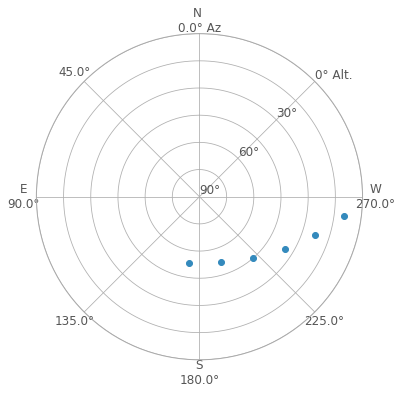

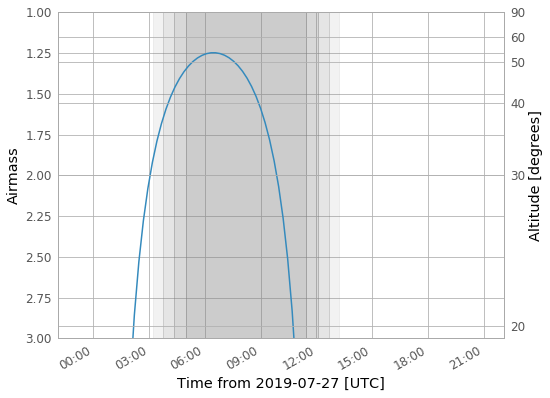

In [9]:
print("Observation at: %s UTC, %s LZT " % (obstime_now.iso, obstime_local.iso))
print("Object rises at: %s UTC" % landolt_rise.iso)
print("Objects sets at: %s UTC" % landolt_set.iso)

landolt_now_sc = landolt_now.transform_to('icrs')

print("Original RA, Dec, {} {}".format(landolt.ra.to_string(unit=u.hourangle, sep=':'),
                                        landolt.dec.to_string(unit=u.degree, sep=':')))
print("Precessed RA, Dec, {} {}".format(landolt_now_sc.ra.to_string(unit=u.hourangle, sep=':'),
                                        landolt_now_sc.dec.to_string(unit=u.degree, sep=':')))
observe_time_range = obstime_now
observe_time_range = obstime_now + np.linspace(-4, 6, 10)*u.hour

plot_sky(landolt_now, Whitney, observe_time_range)

plt.show()
plot_airmass(landolt_now_sc, Whitney, obstime_now, brightness_shading=True, altitude_yaxis=True) 

